## Associations between Variables
personality traits and the usage of psychoactive substance

In [1]:
# Possible Theories to test:
# do soft drugs lead to hard drugs
# Drug use vs OCEAN
# will a drinker smoke? (not enough data, really, would need habit)
# Do Cannabis consumers smoke
# Do Cannabis cosumers drink less
# For US did war on drugs change anything (Theory: no)
# are there straight edge people, do non coffee drinkers/choc eaters abstain from drugs
# Who is a habitual user? we can't guess from data. 

In [2]:
# maybe later
# make interactive plots with plotly, where you can select drug and personality trait
# new cols for low, middle and high risk drugs flagged
# 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('Solarize_Light2')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
df = pd.read_csv('data_new.csv')

In [5]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsivity,Sensations,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,(35-44),female,Professional,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,Last Week,In last Decade,Never,In last Decade,Last Day,Never,Last Week,Never,Never,Never,Never,Never,Never,Never,Never,Never,In last Decade,Never,Never
1,(25-34),male,PHD,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,Last Week,In last Decade,In last Decade,Never,Last Day,Last Month,Last Day,Last Year,Never,Last Month,Never,In last Decade,Never,In last Decade,Last Year,Never,Last Month,Never,Never
2,(35-44),male,Professional,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,Last Day,Never,Never,Never,Last Day,Last Year,Last Month,Never,Never,Never,Never,Never,Never,Never,Never,Over Decade ago,Never,Never,Never
3,(18-24),female,Masters,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,Last Month,Never,Never,Last Year,Last Week,In last Decade,Last Month,In last Decade,Never,Never,Never,In last Decade,Never,Never,Never,Never,In last Decade,Never,Never
4,(35-44),female,PHD,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,Last Month,Over Decade ago,Over Decade ago,Never,Last Day,Last Year,Last Day,Never,Never,Over Decade ago,Never,Never,Over Decade ago,Never,Never,In last Decade,In last Decade,Never,Never


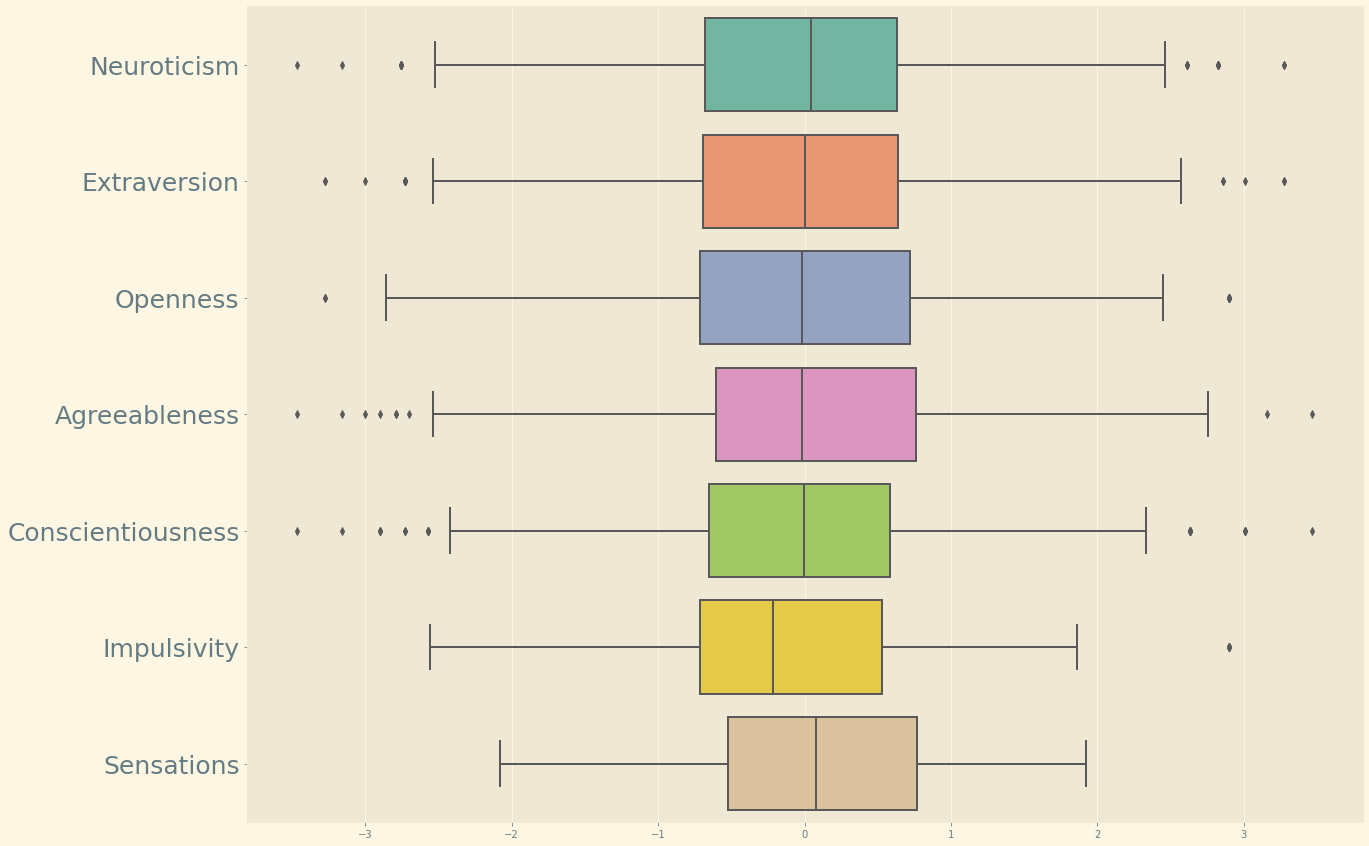

In [6]:
#https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator
#plt.rcParams['font.size'] = 25

fig, ax = plt.subplots(figsize=(20,15))
#plt.title("Personality Traits", fontsize = 30)

data = df[['Neuroticism', 'Extraversion', 'Openness','Agreeableness', 
          'Conscientiousness', 'Impulsivity', 'Sensations']]

ax = sns.boxplot(data = data, orient="h", palette="Set2")
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 25);
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 20);

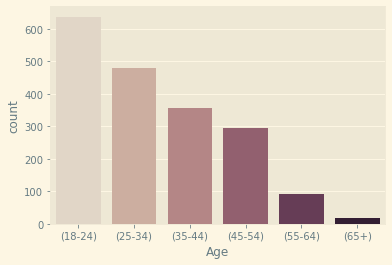

In [7]:
sns.countplot(x='Age', palette='ch:.25', data=df.sort_values(by=['Age']));

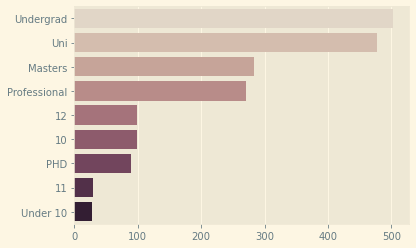

In [8]:
a = df.Education.value_counts()
sns.barplot(x = a.values, y= a.index, palette='ch:.25');


In [9]:
drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin',
'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms', 'Nicotine', 'Semer', 'VSA']

In [10]:
for i in drugs:
    print(i.upper())
    print(df[i].value_counts())

ALCOHOL
Last Week          758
Last Day           503
Last Month         284
Last Year          197
In last Decade      68
Over Decade ago     34
Never               33
Name: Alcohol, dtype: int64
AMPHET
Never              973
In last Decade     241
Over Decade ago    230
Last Year          196
Last Day           101
Last Month          75
Last Week           61
Name: Amphet, dtype: int64
AMYL
Never              1299
In last Decade      236
Over Decade ago     210
Last Year            91
Last Month           24
Last Week            14
Last Day              3
Name: Amyl, dtype: int64
BENZOS
Never              999
Last Year          234
In last Decade     230
Last Month         119
Over Decade ago    116
Last Day            95
Last Week           84
Name: Benzos, dtype: int64
CAFF
Last Day           1380
Last Week           271
Last Month          106
Last Year            59
Never                27
In last Decade       24
Over Decade ago      10
Name: Caff, dtype: int64
CANNABIS
Last Day

## Get Dummy Variables for Categorical Variables

In [11]:
# dummy
df_d = pd.get_dummies(df, drop_first=True)

## Personality Traits

In [12]:
# OCEAN attributes
df.describe()

,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsivity,Sensations
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408
std,0.998442,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074
min,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [13]:
# Correlations between Personality Traits
traits = df_d[['Neuroticism',
       'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness',
       'Impulsivity', 'Sensations']]
traits.head()

,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsivity,Sensations
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [14]:
t = traits.corr()

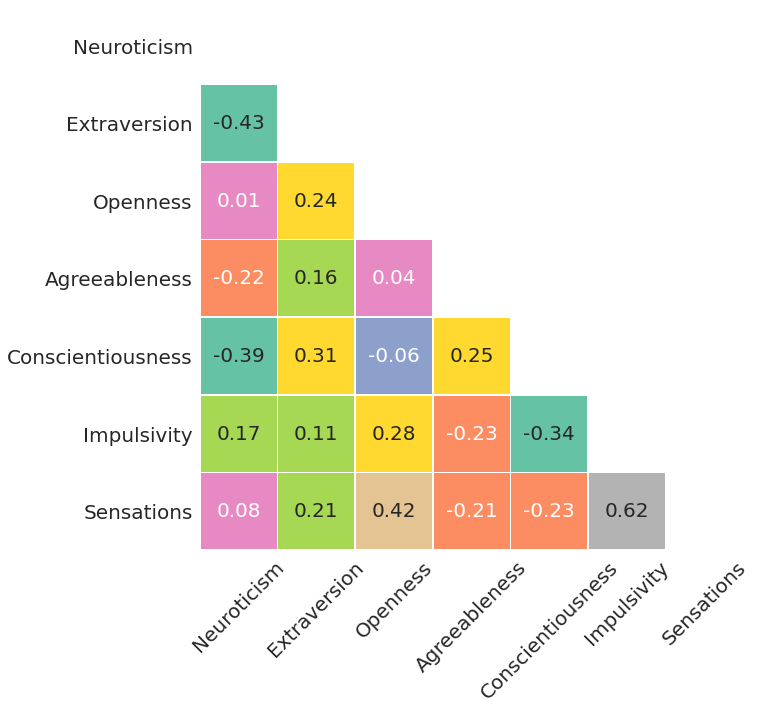

In [15]:
mask = np.zeros_like(t)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(t, mask=mask,  annot = True, annot_kws={'size': 20},  fmt = '.2f', 
            cmap= 'Set2', cbar=False, linewidths=.5, square=True)
#plt.yticks(rotation=0) 
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 20);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 20);

## Interesting Correlations

In [16]:
all_corrs = df_d.corr()
most = all_corrs.unstack()
m = most.sort_values(ascending=False)
m[135:150]

Ketamine_Last Year        Ketamine_Last Year          1.000000
Ketamine_Never            Ketamine_Never              1.000000
Ketamine_Over Decade ago  Ketamine_Over Decade ago    1.000000
Openness                  Openness                    1.000000
Choc_Last Month           Choc_Last Month             1.000000
VSA_Over Decade ago       VSA_Over Decade ago         1.000000
Shrooms_Never             LSD_Never                   0.647848
LSD_Never                 Shrooms_Never               0.647848
LSD_Over Decade ago       Shrooms_Over Decade ago     0.629594
Shrooms_Over Decade ago   LSD_Over Decade ago         0.629594
Amphet_Never              Coke_Never                  0.628132
Coke_Never                Amphet_Never                0.628132
Impulsivity               Sensations                  0.622500
Sensations                Impulsivity                 0.622500
Ecstasy_Never             Coke_Never                  0.619460
dtype: float64

In [17]:
all_corrs.loc['Country_UK', 'Neuroticism']

-0.1264255544518039

In [18]:
# Countries and Neuroticism
df.groupby('Country')['Neuroticism'].mean().sort_values()

Country
UK           -0.113275
Ireland      -0.072811
Other        -0.070698
Australia    -0.060185
Canada        0.100772
USA           0.217179
NewZealand    0.343906
Name: Neuroticism, dtype: float64

In [19]:
[col for col in df_d if col.startswith('Country')]

['Country_Canada',
 'Country_Ireland',
 'Country_NewZealand',
 'Country_Other',
 'Country_UK',
 'Country_USA']

In [20]:
for i in ['Country_Canada',
 'Country_Ireland',
 'Country_NewZealand',
 'Country_Other',
 'Country_UK',
 'Country_USA']:
    print(df_d.loc[df_d['Nicotine_Last Day']==1])

      Neuroticism  Extraversion  Openness  Agreeableness  Conscientiousness  \
5        -0.67825      -0.30033  -1.55521        2.03972            1.63088   
6        -0.46725      -1.09207  -0.45174       -0.30172            0.93949   
8         0.62967       2.57309  -0.97631        0.76096            1.13407   
9        -0.24649       0.00332  -1.42424        0.59042            0.12331   
11       -1.32828       0.00332   0.14143       -1.92595           -0.52745   
12        2.28554       0.16767   0.44585       -1.62090           -0.78155   
14       -0.92104       1.45421   0.44585       -0.60633            1.63088   
16       -1.55078      -0.80615  -1.68062        0.28783            0.75830   
17        0.52135      -1.23177  -0.31776       -0.45321           -1.38502   
23        1.60383      -3.27393  -1.27553        0.28783           -1.01450   
24       -0.14882       0.63779   1.24033        0.76096            1.46191   
26       -0.05188      -1.63340  -3.27393       -0.7

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Plotting of interesting Associations

In [21]:
# Do Smokers drink?
df_d.loc[(df_d['Nicotine_Last Day']==1) & (df_d['Alcohol_Last Day']==1)].shape

(184, 141)

In [22]:
df_d['Nicotine_Last Day'].value_counts()

0    1270
1     607
Name: Nicotine_Last Day, dtype: int64

In [23]:
# How about alc and nicotine?
df.Alcohol.value_counts().sort_index()

In last Decade      68
Last Day           503
Last Month         284
Last Week          758
Last Year          197
Never               33
Over Decade ago     34
Name: Alcohol, dtype: int64

In [24]:
df.Nicotine.value_counts().sort_index()

In last Decade     203
Last Day           607
Last Month         106
Last Week          156
Last Year          184
Never              428
Over Decade ago    193
Name: Nicotine, dtype: int64

#### Age, Education, Ethnicities, Countries

In [25]:
# prevalent Age group, Edu, Ehtnicity, Drug
for i in ['Age', 'Country', 'Education', 'Ethnicity']:
       print(df[i].describe())

count        1877
unique          6
top       (18-24)
freq          637
Name: Age, dtype: object
count     1877
unique       7
top         UK
freq      1044
Name: Country, dtype: object
count          1877
unique            9
top       Undergrad
freq            503
Name: Education, dtype: object
count      1877
unique        7
top       White
freq       1715
Name: Ethnicity, dtype: object


In [26]:
for i in ['Age', 'Country', 'Education', 'Ethnicity']:
        print(i.upper())
        print(df[i].value_counts())

AGE
(18-24)    637
(25-34)    480
(35-44)    355
(45-54)    294
(55-64)     93
(65+)       18
Name: Age, dtype: int64
COUNTRY
UK            1044
USA            551
Other          118
Canada          87
Australia       52
Ireland         20
NewZealand       5
Name: Country, dtype: int64
EDUCATION
Undergrad       503
Uni             478
Masters         283
Professional    270
12               99
10               98
PHD              89
11               29
Under 10         28
Name: Education, dtype: int64
ETHNICITY
White                1715
Other                  62
Black                  33
Asian                  25
Mixed-White/Asian      20
Mixed-White/Black      19
Mixed-Black/Asian       3
Name: Ethnicity, dtype: int64


## Personality Profiles and different Drugs
- How do personality, gender, education, nationality, age, and other attributes affect this risk?  
- Which personality traits are most important for finding the risk of consumption of a particular drug
- Do these traits differ for different drugs?

### Personality and risk of Heroin Consumption

In [27]:
df.groupby('Heroin').size()

Heroin
In last Decade       91
Last Day             13
Last Month           24
Last Week            16
Last Year            65
Never              1600
Over Decade ago      68
dtype: int64

In [28]:
df.groupby('Heroin')['Neuroticism'].mean()

Heroin
In last Decade     0.344471
Last Day           1.016301
Last Month         0.404652
Last Week          0.701618
Last Year          0.417752
Never             -0.069071
Over Decade ago    0.247485
Name: Neuroticism, dtype: float64

In [29]:
df.groupby('Heroin')['Openness'].mean()

Heroin
In last Decade     0.536868
Last Day           0.258962
Last Month         0.260245
Last Week          0.267955
Last Year          0.412560
Never             -0.069523
Over Decade ago    0.229635
Name: Openness, dtype: float64

In [30]:
extra_h = df.groupby('Heroin')['Extraversion'].mean()
extra_h

Heroin
In last Decade    -0.075462
Last Day          -0.704285
Last Month        -0.321127
Last Week         -0.318536
Last Year         -0.069077
Never              0.030087
Over Decade ago   -0.271849
Name: Extraversion, dtype: float64

In [31]:
imp_h = df.groupby('Heroin')['Impulsivity'].mean().sort_values()
imp_h

Heroin
Never             -0.072796
Over Decade ago    0.169860
Last Day           0.471512
Last Year          0.486325
In last Decade     0.518240
Last Month         0.718766
Last Week          0.794266
Name: Impulsivity, dtype: float64

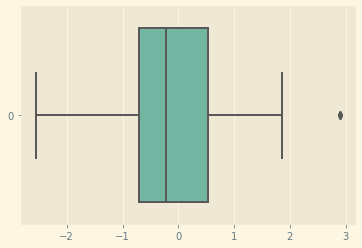

In [32]:
ax = sns.boxplot(data = df.Impulsivity, orient="h", palette="Set2")

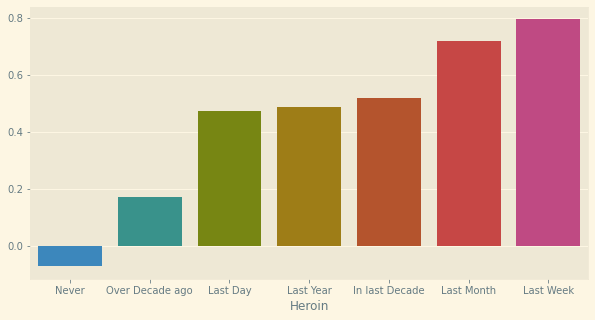

In [33]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = imp_h.index, y = imp_h.values);
#plt.title("Impulsivity vs Heroin Use", fontsize = 20);

So impulsive People really need to take care!
Can we use the information to protect kids from becoming future addicts?

### Personality and risk of Ecstasy Consumption

In [34]:
df.groupby('Ecstasy')['Neuroticism'].mean().sort_values()

Ecstasy
Last Month        -0.101254
Never             -0.093107
Last Week         -0.087997
Over Decade ago    0.043930
Last Year          0.175410
In last Decade     0.233568
Last Day           0.367888
Name: Neuroticism, dtype: float64

### Add new columns for drugs consumption for more analysis

In [35]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html
# Funktion klappt nicht mit Arguments für drug

In [36]:
def newcol(row):
    if row['Heroin'] == 'Last Day' \
    or row['Heroin'] == 'Last Week' \
    or row['Heroin'] == 'Last Month'\
    or row['Heroin'] == 'Last Year'\
    or row['Heroin'] == 'Last Decade':
        val = 1
    else:
        val = 0
    return val   

In [37]:
df['heroin'] = df.apply(newcol, axis=1)

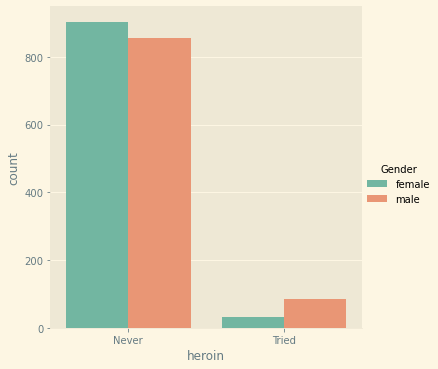

In [38]:
g = sns.catplot(x="heroin", kind="count", palette="Set2", data=df, hue='Gender');
g.set_xticklabels(['Never', 'Tried']);

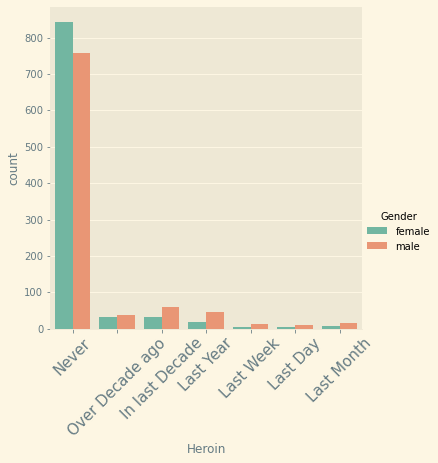

In [39]:
ax = sns.catplot(x="Heroin", kind="count", palette="Set2", data=df, hue='Gender');
ax.set_xticklabels(rotation = 45, fontsize = 15);

In [40]:
df.groupby('heroin')['Neuroticism'].mean()

heroin
0   -0.03544
1    0.51952
Name: Neuroticism, dtype: float64

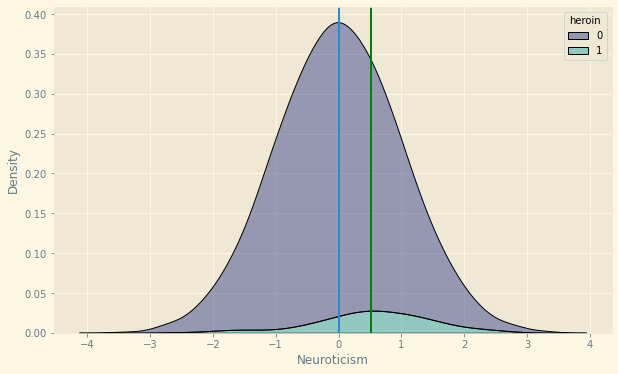

In [41]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.kdeplot(data=df, x="Neuroticism", hue='heroin', 
            palette="mako", fill=True, multiple="stack", alpha=.5);
plt.axvline(df.Neuroticism.mean());
plt.axvline(0.51952, color='green');

In [42]:
def newcol(row):
    if row['Ecstasy'] == 'Last Day' \
    or row['Ecstasy'] == 'Last Week' \
    or row['Ecstasy'] == 'Last Month'\
    or row['Ecstasy'] == 'Last Year'\
    or row['Ecstasy'] == 'Last Decade':
        val = 1
    else:
        val = 0
    return val   

In [43]:
df['ecstasy'] = df.apply(newcol, axis=1)

In [44]:
df.groupby('ecstasy')['Neuroticism'].mean()

ecstasy
0   -0.026291
1    0.067888
Name: Neuroticism, dtype: float64

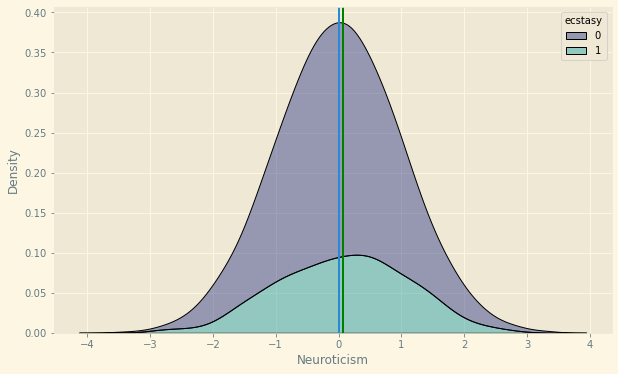

In [45]:
f, ax = plt.subplots(figsize=(10,6))
ax = sns.kdeplot(data=df, x="Neuroticism", hue='ecstasy', 
            palette="mako", fill=True, multiple="stack", alpha=.5);

plt.axvline(df.Neuroticism.mean());
plt.axvline(0.067888, color='green');